# NNDL - HW01
This is the first home work of "Neural Network and Deep Learning" course.  
By:
Ali Ranjbari 810198570

First import libraries

In [1]:
import pandas as pd
import numpy as np
import torch
from matplotlib import pyplot as plt

## Part 01

### B)

first define `mcculloch_pitts` function the return a neuron function

In [2]:
def mcculloch_pitts(weights: list, theta: int):
    
    def function(inputs: list):
        assert len(inputs) == len(weights)
        s = 0
        for w, i in zip(weights, inputs):
            s += w * i
        return 0 if s < theta else 1

    
    return function        

Now implement multipliere network

In [3]:
def multiplier(x1: list, x2: list) -> list:
    assert len(x1) == 2 and len(x2) == 2
    
    
    # define some neurons
    theta = 2
    and2 = mcculloch_pitts([1,1], theta)
    and_not2 = mcculloch_pitts([-1, 2], theta)
    or2 = mcculloch_pitts([2,2], theta)
    
    # define the outputs neurons
    y1 = mcculloch_pitts([2], theta)
    y2 = or2
    y3 = or2
    y4 = and2
    
    # now building the network
    and11_21 = and2([x1[1], x2[1]])       
    and11_22 = and2([x1[1], x2[0]])       
    and12_21 = and2([x1[0], x2[1]])       
    and12_22 = and2([x1[0], x2[0]]) 
    
    and11_22_12_21 = and2([and11_22, and12_21])
    
    y2_andnot1 = and_not2([and12_21, and11_22])
    y2_andnot2 = and_not2([and11_22, and12_21])
    y3_andnot1 = and_not2([and11_22_12_21, and12_22])
    y3_andnot2 = and_not2([and12_22, and11_22_12_21])
    
    return [
        y4([and11_22_12_21, and12_22]),
        y3([y3_andnot1, y3_andnot2]),
        y2([y2_andnot1, y2_andnot2]),
        y1([and11_21])
    ]
          

testing our function on every possible inputs

In [4]:
all_two_bits_numbers = [[0,0],[0,1],[1,0],[1,1]]
decimals = [0,1,2,3]
for number1, d1 in zip(all_two_bits_numbers, decimals):
    for number2, d2 in zip(all_two_bits_numbers, decimals):
        print(f"{number1} * {number2} = {multiplier(number1, number2)} --> {d1} * {d2} = {d1*d2}")

[0, 0] * [0, 0] = [0, 0, 0, 0] --> 0 * 0 = 0
[0, 0] * [0, 1] = [0, 0, 0, 0] --> 0 * 1 = 0
[0, 0] * [1, 0] = [0, 0, 0, 0] --> 0 * 2 = 0
[0, 0] * [1, 1] = [0, 0, 0, 0] --> 0 * 3 = 0
[0, 1] * [0, 0] = [0, 0, 0, 0] --> 1 * 0 = 0
[0, 1] * [0, 1] = [0, 0, 0, 1] --> 1 * 1 = 1
[0, 1] * [1, 0] = [0, 0, 1, 0] --> 1 * 2 = 2
[0, 1] * [1, 1] = [0, 0, 1, 1] --> 1 * 3 = 3
[1, 0] * [0, 0] = [0, 0, 0, 0] --> 2 * 0 = 0
[1, 0] * [0, 1] = [0, 0, 1, 0] --> 2 * 1 = 2
[1, 0] * [1, 0] = [0, 1, 0, 0] --> 2 * 2 = 4
[1, 0] * [1, 1] = [0, 1, 1, 0] --> 2 * 3 = 6
[1, 1] * [0, 0] = [0, 0, 0, 0] --> 3 * 0 = 0
[1, 1] * [0, 1] = [0, 0, 1, 1] --> 3 * 1 = 3
[1, 1] * [1, 0] = [0, 1, 1, 0] --> 3 * 2 = 6
[1, 1] * [1, 1] = [1, 0, 0, 1] --> 3 * 3 = 9


## Part 02

### 2.1) Adaline

#### A)
Define Two datasets with 100 samples
* first dataset:
    * x : with average 1 and SD 0.3
    * y : with average 1 and SD 0.3
* second dataset:
    * x : with average -1 and SD 0.3
    * y : with average -1 and SD 0.3

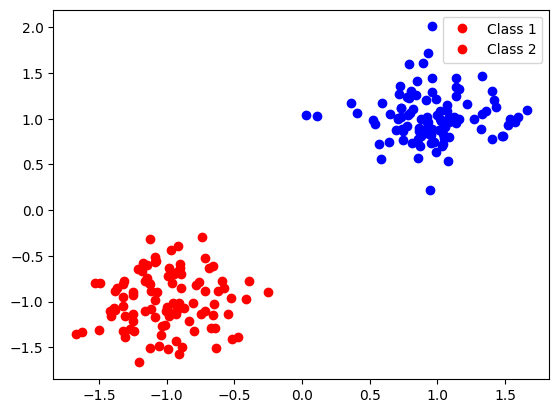

In [5]:
# first dataset
x1 = torch.normal(1, 0.3, (1,100))
y1 = torch.normal(1, 0.3, (1,100))

# second dataset
x2 = torch.normal(-1, 0.3, (1,100))
y2 = torch.normal(-1, 0.3, (1,100))

# plot
plt.plot(x2, y2, "ro", x1, y1, "bo")
plt.legend(["Class 1", "Class 2"])
plt.show()

#### B)
First we define the `adaline` function

In [6]:
class1 = torch.concat([x1, y1, torch.ones_like(x1) * -1])
class2 = torch.concat([x2, y2, torch.ones_like(x2)])
inputs = torch.concat([class1, class2], axis=1)
perm1= torch.randperm(inputs.shape[1])
shuffled_input = inputs[:,perm1]
inputs = shuffled_input[0:2]
targets = shuffled_input[2]

In [7]:
weight = torch.rand((1,2))
bias = torch.rand(1)
torch.sum(weight * inputs[:,1]) + bias

tensor([1.6863])

In [8]:
def adaline(x: torch.Tensor, targets: torch.Tensor, lr: int = 0.5):
    n_features = x.shape[0]
    n_samples = x.shape[1]
    weights = torch.rand((1,n_features))
    bias = torch.rand((1))
    loss = []
    for i in range(n_samples):
        net = torch.sum(weights * x[:,i]) + bias
        weights = weights + lr * (targets[i] - net) * x[:,i]
        bias = bias + lr * (targets[i] - net)
        loss.append(0.5 * (targets[i] - net)**2) 
    
    return ((weights, bias), loss)

def accuracy_adaline(x, targets, weights, bias):
    n_corrects = 0
    for i in range(x.shape[1]):
        net = torch.sum(weights * x[:,i]) + bias
        h = -1 if net < 0 else 1
        if h == targets[i].item():
            n_corrects += 1

    return n_corrects / x.shape[1]

In [9]:
(weights, bias), loss = adaline(inputs, targets)
a = accuracy_adaline(inputs, targets, weights, bias)
print("the accuracy is:",a*100,"%")

the accuracy is: 100.0 %


In [50]:
def get_two_point_for_line(weights, bias, x1 = -2, x2 = 1.5):
    weights = weights.squeeze()
    bias = bias.squeeze()
    slop = -1 * weights[1].item() / weights[0].item()
    bias = bias.item() / weights[0].item()
    
    y1 = x1 * slop + bias
    y2 = x2 * slop + bias
    return ([x1, x2], [y1, y2])

/home/darkknight/.local/lib/python3.8/site-packages/numpy/core/shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)
/home/darkknight/.local/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


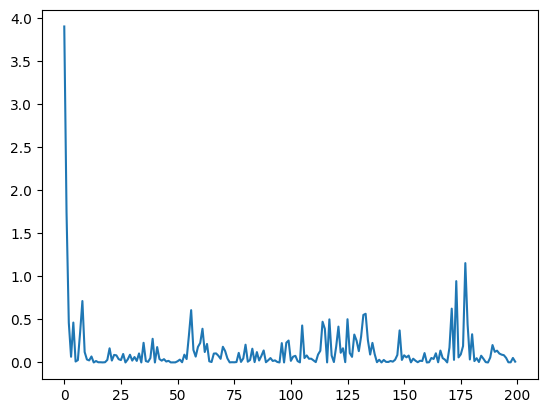

In [11]:
plt.plot(list(range(len(loss))), loss)
plt.show()

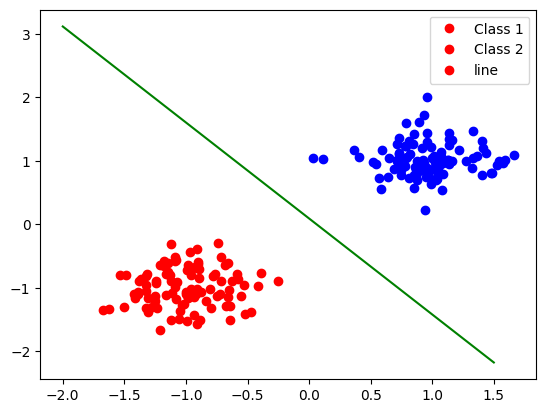

In [12]:
ex_x, ex_y = get_two_point_for_line(weights, bias)
plt.plot(x2, y2, "ro", x1, y1, "bo", ex_x, ex_y, 'g')
plt.legend(["Class 1", "Class 2", "line"])
plt.show()

#### C)

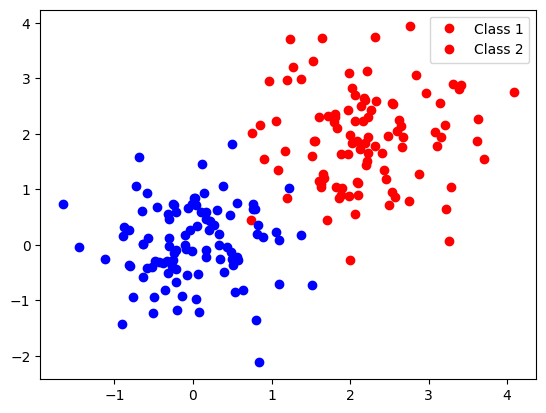

In [53]:
# first dataset
x1 = torch.normal(0, 0.6, (1,100))
y1 = torch.normal(0, 0.6, (1,100))

# second dataset
x2 = torch.normal(2, 0.8, (1,100))
y2 = torch.normal(2, 0.8, (1,100))

# plot
plt.plot(x2, y2, "ro", x1, y1, "bo")
plt.legend(["Class 1", "Class 2"])
plt.show()

In [57]:
class1 = torch.concat([x1, y1, torch.ones_like(x1) * -1])
class2 = torch.concat([x2, y2, torch.ones_like(x2)])
inputs = torch.concat([class1, class2], axis=1)
perm1= torch.randperm(inputs.shape[1])
shuffled_input = inputs[:,perm1]
inputs = shuffled_input[0:2]
targets = shuffled_input[2]

weight = torch.rand((1,2))
bias = torch.rand(1)
torch.sum(weight * inputs[:,1]) + bias

(weights, bias), loss = adaline(inputs, targets)
a = accuracy_adaline(inputs, targets, weights, bias)
print("the accuracy is:",a*100,"%")

the accuracy is: 66.5 %


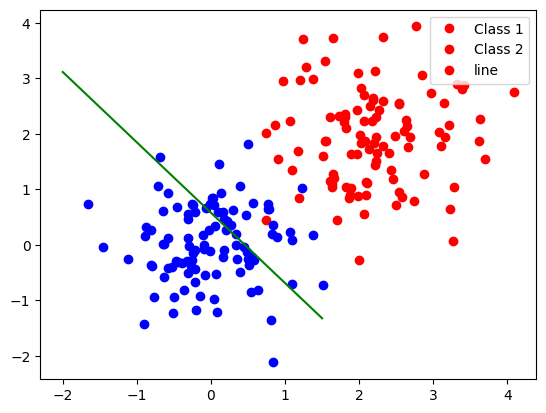

In [58]:
ex_x, ex_y = get_two_point_for_line(weights, bias)
plt.plot(x2, y2, "ro", x1, y1, "bo", ex_x,ex_y, 'g')
plt.legend(["Class 1", "Class 2", "line"])
plt.show()

### 2.2) Madaline

#### A)

#### B)
loading **"Madaline.csv"**

In [26]:
madaline_df = pd.read_csv("Attachments/Q2_Dataset/MadaLine.csv", names=["x", "y", "class"])
madaline_df

,x,y,class
0,-0.642823,0.720606,0.0
1,-0.218126,0.677263,0.0
2,-0.582930,-0.347496,0.0
3,0.285127,0.091750,0.0
4,-0.335577,-0.313893,0.0
...,...,...,...
195,0.744066,-1.206548,1.0
196,-0.457547,1.286227,1.0
197,-1.020000,-0.783926,1.0
198,1.363429,-0.800250,1.0


Now extracting x's and y's and plot them

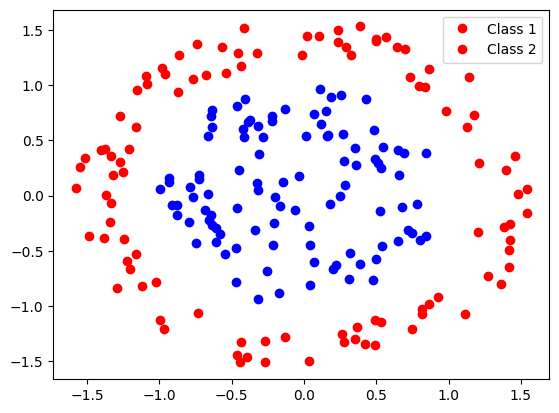

In [59]:
x1 = madaline_df[madaline_df["class"] == 0]["x"].to_list()
y1 = madaline_df[madaline_df["class"] == 0]["y"].to_list()

x2 = madaline_df[madaline_df["class"] == 1]["x"].to_list()
y2 = madaline_df[madaline_df["class"] == 1]["y"].to_list()

# make it a tensor with shape (1, n_sampels)
x1 = torch.tensor([x1])
x2 = torch.tensor([x2])

y1 = torch.tensor([y1])
y2 = torch.tensor([y2])

plt.plot(x2, y2, "ro", x1, y1, "bo")
plt.legend(["Class 1", "Class 2"])
plt.show()

In [60]:
class1 = torch.concat([x1, y1, torch.ones_like(x1) * -1])
class2 = torch.concat([x2, y2, torch.ones_like(x2)])
inputs = torch.concat([class1, class2], axis=1)
perm1= torch.randperm(inputs.shape[1])
shuffled_input = inputs[:,perm1]
inputs = shuffled_input[0:2]
targets = shuffled_input[2]

In [29]:
# MADALINE with MRI algorithm
def madaline(x: torch.Tensor, targets: torch.Tensor,
             n_neurons: int = 4, n_epochs: int = 5, lr: int = 0.5):
    n_features = x.shape[0]
    n_sampels = x.shape[1]
    weights = torch.rand((n_features, n_neurons))
    biases = torch.rand((1, n_neurons))
    output_bias = torch.tensor([(n_neurons-1)/n_neurons])
    output_weights = torch.ones((1, n_neurons))/n_neurons
    epoch = 1
    not_stop = True
    while epoch <= n_epochs and not_stop:
        if(epoch % (n_epochs/10) == 0):
            print(f"epoch: {epoch}")
        epoch += 1
        not_stop = False
        for i in range(n_sampels):
            z_in = torch.mm(x[:,i].unsqueeze(dim=0), weights) + biases
            z = torch.where(z_in >= 0, 1, -1)
            y_in = torch.sum(output_weights * z) + output_bias
            y = 1 if y_in.item() >= 0 else -1
            if y != targets[i].item():
                not_stop = True
                z_in_stacked = torch.vstack([z_in, z_in])
                x_i = x[:,i].unsqueeze(dim=1)
                if targets[i].item() == 1:
                    min_index = z_in.abs().min(1).indices.item()
                    change_factor = torch.zeros((1, n_neurons))
                    change_factor[0,min_index] = 1
                    weights = weights + lr * (1 - z_in_stacked) * x_i * change_factor
                    biases = biases + lr * (1 - z_in) * change_factor
                else: # t == -1
                    change_factor = torch.where(z_in >= 0, 1, 0)
                    weights = weights + lr * (-1 - z_in_stacked) * x_i * change_factor
                    biases = biases + lr * (-1 - z_in) * change_factor
                    
    print(f"total number of epochs {epoch-1}")
    return (weights, biases)

In [30]:
def accuracy_madaline(x: torch.Tensor, targets, weights, biases):
    n_neurons = weights.shape[1]
    output_bias = torch.tensor([(n_neurons-1)/n_neurons])
    output_weights = torch.ones((1, n_neurons))/n_neurons
    
    layer_1 = torch.mm(x.T, weights) + biases # n_samples * n_neurons
    layer_1 = torch.where(layer_1 >= 0, 1, -1)
    output = torch.sum(output_weights*layer_1, dim=1) + output_bias # n_samples
    predict = torch.where(output >= 0 , 1, -1)
    n_corrects = torch.sum(predict == targets).item()

    return 100 * n_corrects / x.shape[1] 

In [64]:
bias

tensor([3.8625e+36])

epoch: 10
epoch: 20
epoch: 30
epoch: 40
epoch: 50
epoch: 60
epoch: 70
epoch: 80
epoch: 90
epoch: 100
total number of epochs 100
accuracy is:
79.0 %


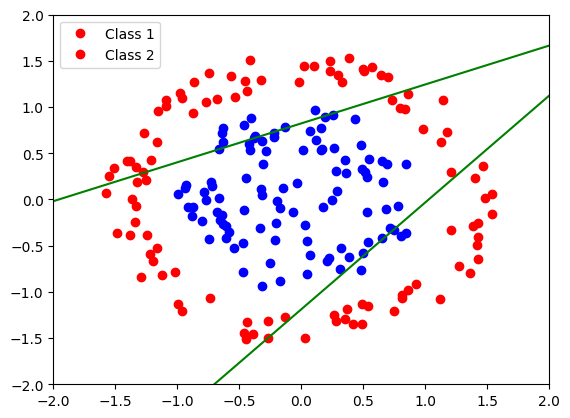

In [86]:
weights, biases = madaline(inputs, targets, n_neurons=2, n_epochs=100)
plt.plot(x2, y2, "ro", x1, y1, "bo")
plt.legend(["Class 1", "Class 2"])
print('accuracy is:')
print(accuracy_madaline(inputs, targets, weights, biases), '%')
for i in range(weights.shape[1]):
    ex_x, ex_y = get_two_point_for_line(weights[:, i], biases[:, i], -100, 100)
    plt.plot(ex_x, ex_y, 'g')
plt.ylim(bottom=-2, top=2)
plt.xlim(left=-2, right=2)
plt.show()


epoch: 10
epoch: 20
epoch: 30
epoch: 40
epoch: 50
epoch: 60
epoch: 70
epoch: 80
epoch: 90
epoch: 100
total number of epochs 100
accuracy is:
99.5 %


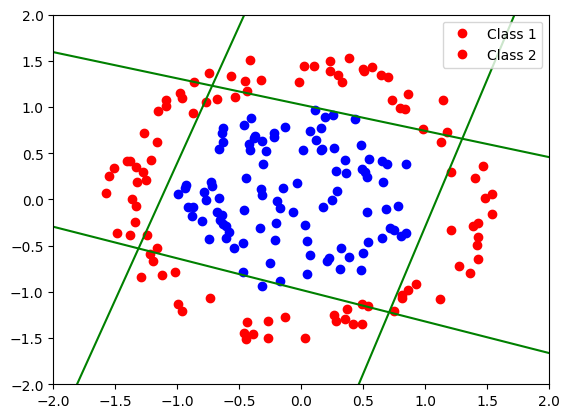

In [84]:
weights, biases = madaline(inputs, targets, n_neurons=4, n_epochs=100)
print('accuracy is:')
print(accuracy_madaline(inputs, targets, weights, biases), '%')
plt.plot(x2, y2, "ro", x1, y1, "bo")
plt.legend(["Class 1", "Class 2"])
for i in range(weights.shape[1]):
    ex_x, ex_y = get_two_point_for_line(weights[:, i], biases[:, i], -100, 100)
    plt.plot(ex_x, ex_y, 'g')
plt.ylim(bottom=-2, top=2)
plt.xlim(left=-2, right=2)
plt.show()

epoch: 10
total number of epochs 11
accuracy is:
100.0 %


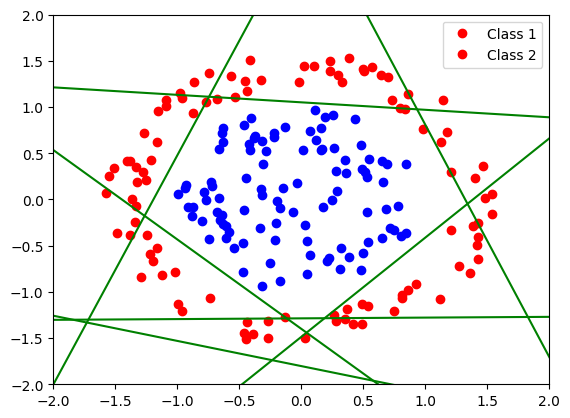

In [85]:
from cProfile import label


weights, biases = madaline(inputs, targets, n_neurons=8, n_epochs=100)
print('accuracy is:')
print(accuracy_madaline(inputs, targets, weights, biases), '%')
plt.plot(x2, y2, "ro", x1, y1, "bo")
plt.legend(["Class 1", "Class 2"])
for i in range(weights.shape[1]):
    ex_x, ex_y = get_two_point_for_line(weights[:, i], biases[:, i], -100, 100)
    plt.plot(ex_x, ex_y, 'g')
plt.ylim(bottom=-2, top=2)
plt.xlim(left=-2, right=2)
plt.show()